In [1]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


In [4]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [5]:
df.describe

<bound method NDFrame.describe of                                                breadcrumb  ...  car_id
0         [Osobowe, Dacia, Logan, Dacia Logan II (2012-)]  ...       0
2       [Osobowe, Peugeot, 3008, Peugeot 3008 I (2009-...  ...       2
3       [Osobowe, Porsche, Cayenne, Porsche Cayenne II...  ...       3
4       [Osobowe, Peugeot, 308, Peugeot 308 T7 (2008-2...  ...       4
5       [Osobowe, Volkswagen, Golf, Volkswagen Golf VI...  ...       5
...                                                   ...  ...     ...
160609  [Osobowe, Hyundai, i20, Hyundai i20 I (2008-20...  ...  160609
160610                            [Osobowe, Škoda, RAPID]  ...  160610
160611  [Osobowe, Opel, Zafira, Opel Zafira B (2005-20...  ...  160611
160614  [Osobowe, Volkswagen, Passat, Volkswagen Passa...  ...  160614
160615                            [Osobowe, Peugeot, 207]  ...  160615

[106494 rows x 155 columns]>

In [6]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

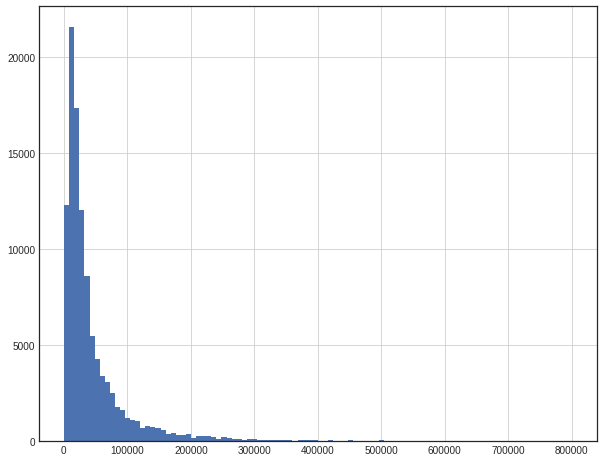

In [15]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-deep')
df['price_value'].hist(bins=100)

In [18]:
df['price_value'].max(), df['price_value'].min()

(799900.0, 400.0)

In [19]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [20]:
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fe08cca20>,
      dtype=object)

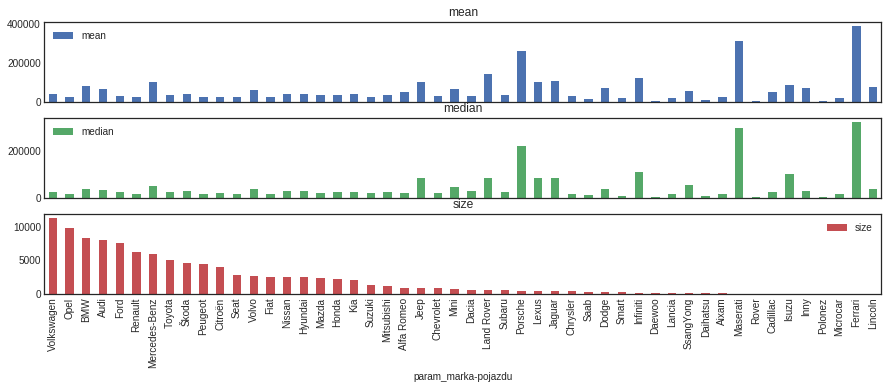

In [39]:
# (
#  df
#  .groupby('param_marka-pojazdu')['price_value']
#  .agg([ np.mean, np.median, np.size ])
#  .sort_values(by='size', ascending=False)
#  .head(50)
# ).plot(kind='bar', figsize=(15, 5), subplots=True)

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return (
  df
 .groupby(feat_groupby)[feat_agg]
 .agg(agg_funcs)
 .sort_values(by=feat_sort, ascending=False)
 .head(top)
).plot(kind='bar', figsize=(15, 5), subplots=subplots)

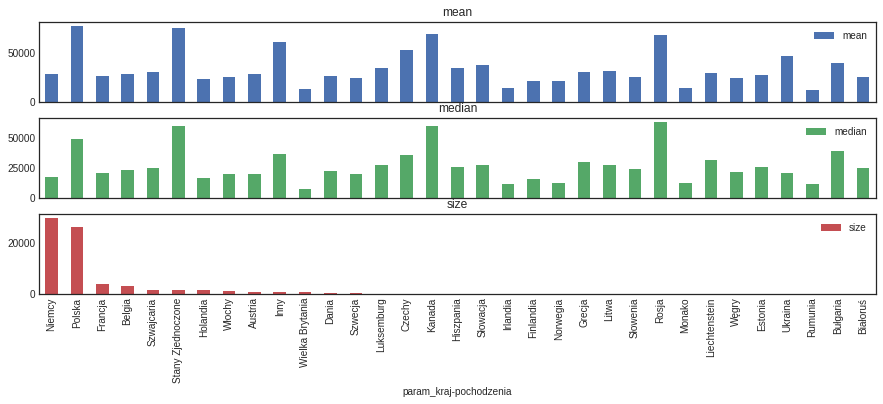

In [47]:
group_and_barplot('param_kraj-pochodzenia', feat_sort='size');

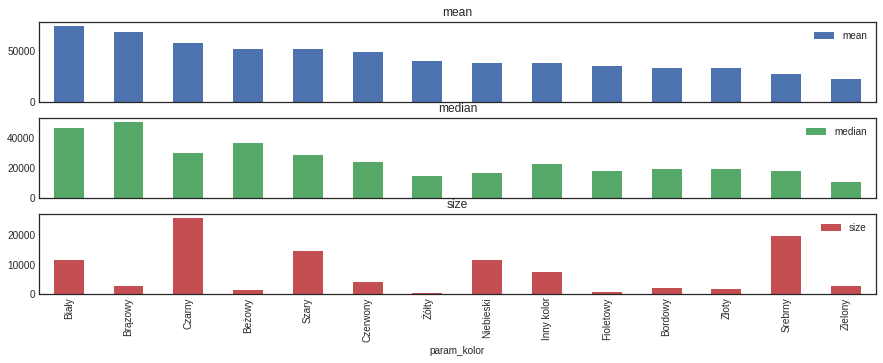

In [49]:
group_and_barplot('param_kolor', feat_sort='mean');